# Loading Data

In [23]:
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv(r'dataset\train.csv')
HOUSE_FEATURES = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                  'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
                  'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
                  'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                  'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
                  'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 
                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
                  'MiscVal', 'SaleType', 'SaleCondition']

X = train_data[HOUSE_FEATURES]
y = train_data['SalePrice']


# Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Houses by Price')

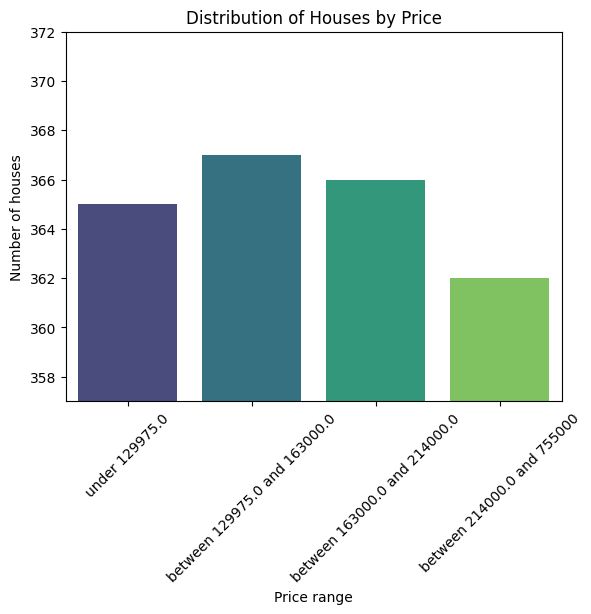

In [45]:
quantiles = y.quantile([.25, .5, .75])

q1 = y.loc[y.values <= quantiles[0.25]]
q2 = y.loc[(y.values > quantiles[0.25]) & (y.values <= quantiles[0.5])]
q3 = y.loc[(y.values > quantiles[0.5]) & (y.values <= quantiles[0.75])]
q4 = y.loc[y.values > quantiles[0.75]]
prices_distribution = pd.DataFrame(np.array([[f'under {quantiles[0.25]}', len(q1.values)], 
                                             [f'between {quantiles[0.25]} and {quantiles[0.5]}', len(q2.values)], 
                                             [f'between {quantiles[0.5]} and {quantiles[0.75]}', len(q3.values)], 
                                             [f'between {quantiles[0.75]} and {y.max()}', len(q4.values)]]), columns=['range', 'houses'])
prices_distribution['houses'] = prices_distribution['houses'].astype(int)

plt.figure()
sns.barplot(x='range',
            y='houses',
            data=prices_distribution,
            hue='range',
            palette='viridis')
plt.xticks(rotation=45)
plt.ylim(prices_distribution['houses'].min() - 5, prices_distribution['houses'].max() + 5)
plt.ylabel('Number of houses')
plt.xlabel('Price range')
plt.title('Distribution of Houses by Price')